# Historical VaR

### Setting Time Range and Tickers

First, let’s set the time range to a certain number of years and create a list of tickers we want to analyze. In this example, we’ll analyze the past 15 years of stock data.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

### Downloading Adjusted Close Prices

Next, we will download the daily adjusted close prices for each ticker in our list using the yfinance library.

In [2]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2008-10-14   74.726990  47.714622   82.199997   29.400581   37.386940
2008-10-15   67.370262  47.423676   83.309998   26.767569   33.890179
2008-10-16   70.176735  47.417194   79.290001   28.219664   35.450165
2008-10-17   69.757622  47.675842   77.209999   28.254656   35.118557
2008-10-20   73.948639  47.656418   78.500000   29.041933   36.919704
...                ...        ...         ...         ...         ...
2023-10-04  424.660004  69.000000  169.139999  359.750000  210.559998
2023-10-05  424.500000  6

### Calculating Daily Log Returns and Dropping NAs

Once we have the adjusted close prices, we can calculate the daily log returns for each stock and drop any NAs from the resulting DataFrame.

In [3]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()
print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2008-10-15 -0.103638 -0.006116  0.013413 -0.093823 -0.098196
2008-10-16  0.040813 -0.000137 -0.049457  0.052828  0.045003
2008-10-17 -0.005990  0.005440 -0.026583  0.001239 -0.009398
2008-10-20  0.058344 -0.000408  0.016570  0.027483  0.050016
2008-10-21 -0.030310  0.016950 -0.031971 -0.053197 -0.030676
...              ...       ...       ...       ...       ...
2023-10-04  0.007256  0.006543 -0.000118  0.013517  0.007197
2023-10-05 -0.000377  0.000724 -0.001834 -0.002951 -0.000523
2023-10-06  0.011803 -0.003918  0.005140  0.016617  0.011856
2023-10-09  0.006382  0.010126  0.018218  0.005087  0.006273
2023-10-10  0.005191 -0.001008 -0.001680  0.005523  0.006187

[3772 rows x 5 columns]


### Creating a Weighted Portfolio

Now, we’ll create a weighted portfolio with a total value of $1,000,000.

In [4]:
portfolio_value = 1000000

weights = np.array([0.1, 0.15, 0.20, 0.25, 0.30])

#weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.1  0.15 0.2  0.25 0.3 ]


### Calculating Historical Portfolio Returns

With the weights defined, we can now calculate the historical portfolio returns.

In [5]:
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

Date
2008-10-15   -0.061513
2008-10-16    0.020877
2008-10-17   -0.007609
2008-10-20    0.030963
2008-10-21   -0.029385
                ...   
2023-10-04    0.007222
2023-10-05   -0.001190
2023-10-06    0.009332
2023-10-09    0.008954
2023-10-10    0.003269
Length: 3772, dtype: float64


### Finding X-Day Historical Returns

Next, we’ll find the X-day historical returns. In this example, we’ll use a 1-day window.

In [6]:
days = 1

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2008-10-15   -0.061513
2008-10-16    0.020877
2008-10-17   -0.007609
2008-10-20    0.030963
2008-10-21   -0.029385
                ...   
2023-10-04    0.007222
2023-10-05   -0.001190
2023-10-06    0.009332
2023-10-09    0.008954
2023-10-10    0.003269
Length: 3772, dtype: float64


### Calculating VaR Using the Historical Method

Now, we can specify a confidence interval and calculate the Value at Risk (VaR) using the historical method.

In [7]:
#confidence_interval = 0.95
#VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
#print(VaR)

In [8]:
confidence_interval = [0.90, 0.95, 0.99]
significance = [10,5,1]


VaRs = []
for ci in significance:
    VaR = -np.percentile(range_returns, significance)*portfolio_value
    VaRs.append(VaR)

In [9]:
VaR

array([ 8911.83691985, 13287.24071578, 25867.73273311])

In [10]:
Historical_VaR=VaR

In [11]:
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)


for ci, VaR in zip(confidence_interval, VaR):
    print(f'{ci * 100:>6.0f}%: {"":<8} ${VaR.astype(float):>10,.2f}')
    #print(f'{ci * 100:>6.0f}%: {"":<8} ${VaR:>10,.2f}')

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $  8,911.84
    95%:          $ 13,287.24
    99%:          $ 25,867.73


### Plotting the Results of the Historical Returns

Finally, let’s plot the results of the historical returns to visualize the distribution of portfolio returns and the VaR at the specified confidence level.

In [12]:
#return_window = days
#range_returns = historical_returns.rolling(window=return_window).sum()
#range_returns = range_returns.dropna()

#range_returns_dollar = range_returns * portfolio_value

#plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
#plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
#plt.ylabel('Frequency')
#plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
#plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
#plt.legend()
#plt.show()

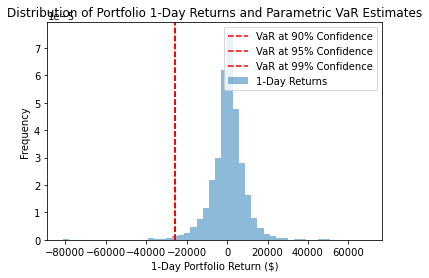

In [13]:
#return_window = days
#range_returns = historical_returns.rolling(window=return_window).sum()
#range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

# Plot the histogram
plt.hist(range_returns_dollar, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

# Add vertical lines representing VaR at each confidence level
for ci, VaR_ in zip(confidence_interval, VaRs):
    plt.axvline(x=-VaR, linestyle='--', color='r', label='VaR at {}% Confidence'.format(int(ci * 100)))

plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()

In a Five-Day Period at a 95 level of confidence the worst thing that could happen at worth fifth percentile is we'd lose about 25861 usd.

# Parametric VaR

We will find the rolling sum of historical returns for a specified number of days:

In [14]:
days = 1
historical_x_day_returns = historical_returns.rolling(window=days).sum()

### Create Covariance Matrix and Calculate Portfolio Standard Deviation

Now, we will create a covariance matrix for all the securities and calculate the portfolio standard deviation:

In [15]:
cov_matrix = log_returns.cov() * 252 #252 because it's 252 days in trade
portfolio_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

### Calculate VaR at Different Confidence Levels

We will calculate the Value at Risk (VaR) at different confidence levels:

In [16]:
from scipy.stats import norm

confidence_levels = [0.90, 0.95, 0.99]

VaRs = []
for cl in confidence_levels:
    VaR = portfolio_value * portfolio_std_dev * norm.ppf(cl) * np.sqrt(days / 252)
    VaRs.append(VaR)

C:\Users\edfra\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Print VaR Results

Let’s print the VaR results for each confidence level:

In [17]:
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)

for cl, VaR in zip(confidence_levels, VaRs):
    print(f'{cl * 100:>6.0f}%: {"":<8} ${VaR:>10,.2f}')

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $ 11,278.93
    95%:          $ 14,476.35
    99%:          $ 20,474.17


### Plot the Distribution of Portfolio Returns and Parametric VaR Estimates

Finally, we will plot the distribution of the X-day portfolio returns and the parametric VaR estimates:

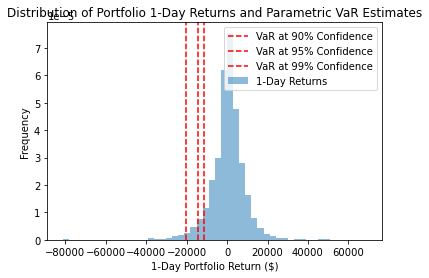

In [18]:
# Convert returns to dollar values for the histogram
historical_x_day_returns_dollar = historical_x_day_returns * portfolio_value

# Plot the histogram
plt.hist(historical_x_day_returns_dollar, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

# Add vertical lines representing VaR at each confidence level
for cl, VaR in zip(confidence_levels, VaRs):
    plt.axvline(x=-VaR, linestyle='--', color='r', label='VaR at {}% Confidence'.format(int(cl * 100)))

plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()

# cVaR

In [19]:
con=[0,1,2]
Historical_VaR= Historical_VaR/1000000
cVaRs = []
for c in con:
    cVaR = -np.mean(range_returns[range_returns < -Historical_VaR[c]])*portfolio_value
    cVaRs.append(cVaR)

In [20]:
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)

for cl, cVaR in zip(confidence_levels, cVaRs):
    print(f'{cl * 100:>6.0f}%: {"":<8} ${cVaR:>10,.2f}')

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $ 16,105.87
    95%:          $ 21,441.57
    99%:          $ 36,532.71


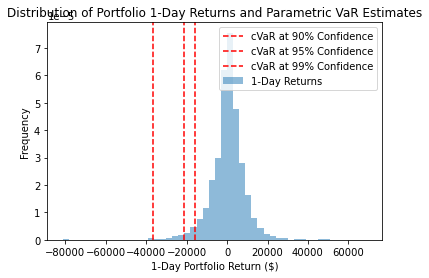

In [21]:
range_returns_dollar = range_returns * portfolio_value

# Plot the histogram
plt.hist(range_returns_dollar, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

# Add vertical lines representing VaR at each confidence level
for ci, cVaR in zip(confidence_interval, cVaRs):
    plt.axvline(x=-cVaR, linestyle='--', color='r', label='cVaR at {}% Confidence'.format(int(ci * 100)))

plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()